# Nigeria SARS Cov 2 forecasting

In this notebook, we are studying the Covid19 spread in Nigeria. To do so, we are going to work on:

- **Short review on adequate contact rate and incidence.**
- **SIRF Model adapted**
- **Fitting data to model: SIRF model approximated.**
- **Find** $\beta, \gamma, \delta$
- **Behaviour of disease**
- **Logistic carrying capacity**
- **Covid 19 visualizing and types of mitigation across country (Economic impact of the virus and Public health mitigations)**
- **Some statistic and polynomial regression**
    - **Correlation**
    - **Partial Correlation**
- **Prophet model for Confirmed case**
    - **Validation**
    - **Forecasting**
- **Forecast recovered, current confirmed case, deaths**
- **Transmission dynamics of the virus:** $\beta(t), \gamma(t), \delta(t)$ **and** $R_0(t)$ 
- **Growth rate for Infective compartment**
- **Forecasting ratio reproductive number using autoregression**
- **Carrying capacity**
- **Comparing Cameroon with another country in the world**

## Adequate contact rate and incidence

**Contact rate $U(N)$** is the number of individuals contacted by infective per unit of time. Suppose that the probability of infection by each contact is $\beta_0$, then the **adequate contact rate** is $\beta_0U(N)$. 

The mean adequate contact rate of an infected individual to a susceptible is $\beta_0U(N)\dfrac{S}{N}$. This rate is called an **infection rate**. Then the total new infectives infected by all individuals in the infected compartiment per unit of time, at time t is $(\beta_0U(N)\dfrac{S}{N})I$, which is called **incidence** of disease.

- If $U(N) = kN$ that is, the contact rate is proportional to the total population size, the incidence is $\beta(t)S(t)I(t)$, where $\beta = \beta_0k$ is called the transmission coefficient(transmission rate). This type of incidence is called **bilinear incidence**
- If $U(N) = k^{'}$, that is, the contact rate is a constant in this case, the incidence become $\beta I\dfrac{S}{N}$, where $\beta = \beta_0k^{'}$, and it is called **standard incidence**.

**Extract from: Zhien Ma, Jia Li - Dynamical Modeling and Anaylsis of Epidemics-World Scientific Publishing Company (2009)**

### SIRF Model with standard incidence  adapted

**Can we find the model that explain well the spreading of covid 19 in the world?**

We know that covid19 have many importants variables but our data, we have four  **ConfirmedCases(TotalpositiveCases), CurrentConfirmedCases(CurrentpositiveCases), Recovered and Deaths**. How can we obtain the dynamics system equation for these variables? To answer this question, we are going to use the SIRF Model with standard incidence:

The SIRF model with standard incidence  is a classic model in epidemiology, it contain 04 subpopulations, the susceptibles **S**, the infectives **I** and recovered individuals **R**, fatalities **F**:

> Susceptiles 

> Infective

> Recovered

> Fatalities

The susceptible can become infective, and the infectives can become recovered or Fatalities, but no other transitions are considered.
The population $N = S + I + R + F$ remains constant. The model describes the movement between the classes by the system of differential equations.

> $\dfrac{dS}{dt} = -\beta I\dfrac{S}{N}$, $\qquad$ $\dfrac{dI}{dt} = \beta I\dfrac{S}{N} -(\gamma +\delta) I$, $\qquad$ $\dfrac{dR}{dt} = \gamma I$ $\qquad$ $\dfrac{dF}{dt} = \delta I$.  Where  $\beta$ is the transmission rate, $\gamma$ is the recovery rate, $\delta$ is fatalities rate and $R_{0}=\dfrac{\beta }{\gamma+\delta}$

### Practical:  SIRF approximated

In the context of sars cov 2 in the world, we need to adapt SIRF model to our data such that we can make some approximation on behavior of disease and define transmission rate and others. If we consider **(N)**  the number of population in some fixed surface ($Km^{2}$) at time t. We know that there will exist some confirmed cases population and non confirmed cases population.

**population size = totalpositivecases + totalnegativecases** and **totalpositivecases = currentpositivecases + (recovered + death)**

hence,

**population size = totalnegativecases + currentpositivecases + recovered + death**  (1)

From (1) we can make some identification:

> population size can be a total Population (N).

> totalnegativecases can be a Susceptible (S)

> currentpositivecases can be an Infective (I) 

> recovered + death can be a Recovered individuals (R) + Fatalities (F)

We can write again:

$S = N  - S_c \rightarrow \dfrac{S}{N} = 1 - \dfrac{S_c}{N}$ if $  \dfrac{S_c}{N} << 1 $ we have $S \approx N$ and SIRF Model with standard  incidence become:

$\dfrac{dI}{dt} = (\beta - \gamma - \delta)I$, $\qquad$ $\dfrac{dR}{dt} = \gamma I$ $\qquad$ $\dfrac{dF}{dt} = \delta I$

### Estimate $\beta(t), \gamma(t), \delta(t)$

> $\beta(t) = \dfrac{the \:  number \: of \:  daily \:  currentConfirmed \:  covid19 \:  patients \:  at \:  time \:  t}{the \:  number \:  of \:  accummulated \:  confirmed \:  covid19 \:  patients \:  at \:  time \:  t}$

> $\gamma(t) = \dfrac{the \:  number \: of \:  daily \:  recovered \:  covid19 \:  patients \:  at \:  time \:  t}{the \:  number \:  of \:  accummulated \:  confirmed \:  covid19 \:  patients \:  at \:  time \:  t}$

> $\delta(t) = \dfrac{the \:  number \: of \:  daily \:  deaths \:  covid19 \:  patients \:  at \:  time \:  t}{the \:  number \:  of \:  accummulated \:  confirmed \:  covid19 \:  patients \:  at \:  time \:  t}$

**Source: Zhien Ma, Jia Li - Dynamical Modeling and Anaylsis of Epidemics-World Scientific Publishing Company (2009)**

# Behaviour of Covid 19 disease 

The behaviour of disease depends on the state of ratio reproductive number $R_0(t)$ over time. Disease have three behaviours following the state of $R_0(t)=\dfrac{\beta(t) }{\gamma(t)+\delta(t)}$.

> If $\dfrac{dI}{Idt} > 0$ then $R_{0}(t) > 1 $ **the disease outbreaks again**.

> If $\dfrac{dI}{Idt} \approx 0$ then $R_{0}(t) \approx 1 $, also $ \beta(t) \approx \gamma(t)+\delta(t)$ **the disease remains constant over time, it is the buffer state of the disease**.

> If $\dfrac{dI}{Idt} < 0$  then $R_{0}(t) < 1 $ **the disease die out**.

In [1]:
 # importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
    # for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
    
# Importing Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso    
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [7]:
# import package

import matplotlib.pyplot as plt
import seaborn as sns 
#import statsmodels as sm
#import folium as fl
from pathlib import Path
from sklearn.impute import SimpleImputer
#import geopandas as gpd
#import mapclassify as mpc
import warnings
#import cufflinks
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
%matplotlib inline
#pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()
#gpd.plotting.plot_linestring_collection
sns.set()
warnings.filterwarnings('ignore')

In [10]:
covidfile = r'C:\Users\Hp\Documents\dataset\kaggle\corona visualization\a1\novel-corona-virus-2019-dataset (2)\covid_19_data.csv'

In [11]:
covid19 = pd.read_csv(covidfile, parse_dates=True)

In [12]:
covid19.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
22184,22185,05/06/2020,Wyoming,US,2020-05-07 02:32:28,631.0,7.0,0.0
22185,22186,05/06/2020,Xinjiang,Mainland China,2020-05-07 02:32:28,76.0,3.0,73.0
22186,22187,05/06/2020,Yukon,Canada,2020-05-07 02:32:28,11.0,0.0,0.0
22187,22188,05/06/2020,Yunnan,Mainland China,2020-05-07 02:32:28,185.0,2.0,181.0
22188,22189,05/06/2020,Zhejiang,Mainland China,2020-05-07 02:32:28,1268.0,1.0,1267.0


**Cleaning data**

In [13]:
covid19.isnull().sum()[covid19.isnull().sum()>0]

Province/State    11463
dtype: int64

In [14]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              22189 non-null  int64  
 1   ObservationDate  22189 non-null  object 
 2   Province/State   10726 non-null  object 
 3   Country/Region   22189 non-null  object 
 4   Last Update      22189 non-null  object 
 5   Confirmed        22189 non-null  float64
 6   Deaths           22189 non-null  float64
 7   Recovered        22189 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
covid19['ObservationDate'] = pd.DataFrame(covid19['ObservationDate'])
covid19['currentCase'] = covid19['Confirmed'] - covid19['Recovered'] - covid19['Deaths']

In [16]:
replace = ['Dem. Rep. Congo', "Côte d'Ivoire", 'Congo', 'United Kingdom', 'China','Central African Rep.',
          'Eq. Guinea','eSwatini','Bosnia and Herz.', 'S. Sudan', 'Dominican Rep.', 'W. Sahara',
          'United States of America']

name = ['Congo (Kinshasa)', 'Ivory Coast', 'Congo (Brazzaville)', 'UK', 'Mainland China', 
        'Central African Republic', 'Equatorial Guinea', 'Eswatini', 'Bosnia and Herzegovina', 'South Sudan',
       'Dominica', 'Western Sahara','US']

In [17]:
covid_data = covid19.drop(columns=['Province/State'])
covid_data = covid_data.replace(to_replace=name, value=replace)
#END Cleaning

In [18]:
covid_data.tail()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,currentCase
22184,22185,05/06/2020,United States of America,2020-05-07 02:32:28,631.0,7.0,0.0,624.0
22185,22186,05/06/2020,China,2020-05-07 02:32:28,76.0,3.0,73.0,0.0
22186,22187,05/06/2020,Canada,2020-05-07 02:32:28,11.0,0.0,0.0,11.0
22187,22188,05/06/2020,China,2020-05-07 02:32:28,185.0,2.0,181.0,2.0
22188,22189,05/06/2020,China,2020-05-07 02:32:28,1268.0,1.0,1267.0,0.0


In [19]:
kmerCovid = covid_data[covid19['Country/Region'] == 'Nigeria']
Nigeria = kmerCovid[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered','currentCase']]

# Covid 19 visualizing and types of mitigation across country (Economic impact of the virus and Public health mitigations

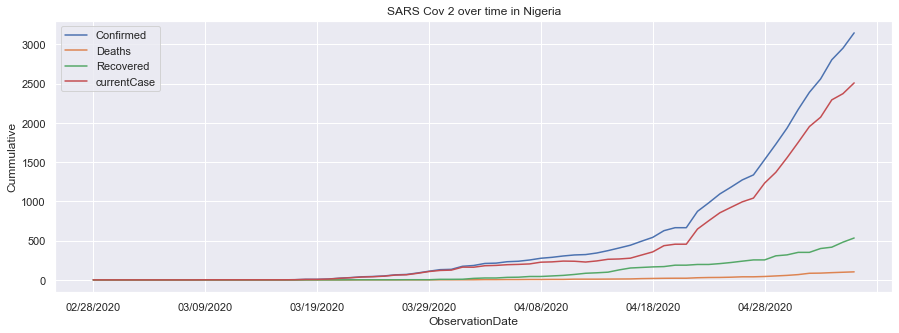

In [20]:
Nigeria.plot(x='ObservationDate',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')
plt.savefig('SARS Cov 2 over time in Nigeria.png')

It was on March 17, 2020 that the government of the State of Cameroon had announced the GOVERNMENTAL STRATEGY OF RIPOSTE FACING THE PANDEMIC OF CORONAVIRUS (COVID-19). This strategy was based on 13 measures that we will only mention the most important, we have:

- *the land, air and sea borders of Cameroon will be closed: all passenger flights from abroad are suspended, with the exception of cargo flights and ships transporting everyday consumer products as well as essential goods and materials , whose stopover times will be limited and supervised; Cameroonians wishing to return to their country will have to attach their various diplomatic representations;*

- *the issuance of entry visas to Cameroon at the various airports is suspended;*
- *all public and private training establishments belonging to different levels of education, from kindergarten to higher, including vocational training centers and grandes écoles will be closed;*
- *gatherings of more than fifty (50) people are prohibited throughout the national territory;*
- *the drinking places, restaurants and places of leisure will be systematically closed from 6 p.m., under the control of the administrative authorities;*
- *urban and interurban journeys should only be made when absolutely necessary;*
- *drivers of buses, taxis and mototaxis are invited to avoid overloads in public transport: law enforcement will take particular care;*
- *the populations are invited to strictly observe the hygiene measures recommended by the World Health Organization, namely in particular washing their hands regularly with soap, avoiding close contact such as shaking hands or kissing, cover your mouth to sneeze.*

**source: https://www.spm.gov.cm/site/?q=fr/content/strategie-gouvernementale-de-riposte-face-la-pandemie-de-coronavirus-covid-19**

Through these measurements, we see very well that the disease could not develop so easily until the point where the curve reaches saturation after two days. **April 5 to April 7, 2020**. But after **April 7, 2020** it starts to be like a staircase curve. What can be behind this behavior? Are there one or more parameters that can explain this? we will be following this notebook.

In the meantime, because of the socio-economic situation of this country imposed by Covid19, the government of Cameroon was forced to relax the measures to combat Covid19 on April 30, 2020: we will mention the most important that can promote the surge of the pandemic in Cameroon; We have:

- Opening after 6 p.m., drinking places, restaurants and places of leisure, with the obligation for customers and users to respect barrier measures, in particular the wearing of protective masks and social distancing.
- lifting of the measure reducing the regulatory number of passengers in all public transport by bus and taxis. Wearing a mask is compulsory and overloading is prohibited.

**source: https://www.bbc.com/afrique/52496808**

What worries me with these two measures from the current 19 measures, is the fact that Cameroonians do not know individual responsibility for respecting the barrier measures against SARS Cov 2. The government's decision could bring an exponential growth of the disease . Bars, restaurants, public transport, etc. are places with high risk and high transmission of the disease. The worse is yet to come. Can we predict the worst for a chance to escape it? we will see it below.

In [21]:
print('========= COVID-19 Nigeria ==============================')
print("======== Daily report {} ===============\n".format(Nigeria.ObservationDate.max()))
print('1- Total Confirmed: {}'.format(Nigeria['Confirmed'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('2- Total Deaths: {}'.format(Nigeria['Deaths'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('3- Total Recovered: {}'.format(Nigeria['Recovered'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('4- Total CurrentCase: {}'.format(Nigeria['currentCase'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('============================================================')

========= COVID-19 Nigeria ==============================
======== Daily report 05/06/2020 ===============

1- Total Confirmed: 3145.0
2- Total Deaths: 103.0
3- Total Recovered: 534.0
4- Total CurrentCase: 2508.0


In [22]:
def piechart(data, xplod, lab, filename):
    ''' This fonction have 3 arguments: data, explode, labels and filename in string '''
    
    kolors = ['red', 'green', 'yellow', 'blue', 'cyan', 'tan', 'wheat']
    
    n= len(lab)
    colrs =  kolors[:n]
    
    fig, ax = plt.subplots(figsize=(8, 3.5))
    
    ax.pie(data, explode=xplod, labels=lab, autopct='%1.1f%%', startangle=270, colors= colrs)
    ax.axis('equal')
    #fig.save_fig(filename+'.png', dpi=125)
    fig.suptitle(filename)
    #fig.savefig(filename+'.png', dpi=125)

In [23]:
daily = Nigeria[Nigeria.ObservationDate == Nigeria.ObservationDate.max()]
daily_data = daily.drop(columns='ObservationDate').copy()

In [24]:
daily_data['Deaths'] = (daily_data['Deaths']/daily_data.Confirmed)*100
daily_data['Recovered'] = (daily_data['Recovered']/daily_data.Confirmed)*100
daily_data['currentCase'] = (daily_data['currentCase']/daily_data.Confirmed)*100

In [25]:
x = daily_data.drop(columns='Confirmed')

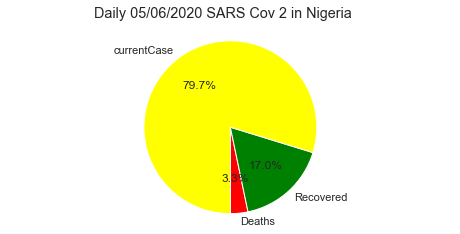

In [26]:
piechart(x, (0,0,0), x.columns,  'Daily {} SARS Cov 2 in Nigeria'.format( Nigeria.ObservationDate.max()))

# Some statistic and Polynomial regression

In [27]:
Nigeria.describe()

,Confirmed,Deaths,Recovered,currentCase
count,69.000000,69.000000,69.000000,69.000000
mean,527.014493,16.217391,95.826087,414.971014
std,807.328027,26.650168,135.729722,648.429210
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,184.000000,2.000000,20.000000,163.000000
75%,627.000000,21.000000,170.000000,436.000000
max,3145.000000,103.000000,534.000000,2508.000000


In [28]:
Nigeria.corr()

,Confirmed,Deaths,Recovered,currentCase
Confirmed,1.000000,0.997238,0.979208,0.999097
Deaths,0.997238,1.000000,0.976053,0.996206
Recovered,0.979208,0.976053,1.000000,0.969728
currentCase,0.999097,0.996206,0.969728,1.000000


#### Partial Correlation

In probability theory and statistics, partial correlation measures the degree of association between two random variables, with the effect of a set of controlling random variables removed. If we are interested in finding to what extent there is a numerical relationship between two variables of interest, using their correlation coefficient will give misleading results if there is another, confounding, variable that is numerically related to both variables of interest. This misleading information can be avoided by controlling for the confounding variable, which is done by computing the partial correlation coefficient. This is precisely the motivation for including other right-side variables in a multiple regression; but while multiple regression gives unbiased results for the effect size, it does not give a numerical value of a measure of the strength of the relationship between the two variables of interest.

For example, if we have economic data on the consumption, income, and wealth of various individuals and we wish to see if there is a relationship between consumption and income, failing to control for wealth when computing a correlation coefficient between consumption and income would give a misleading result, since income might be numerically related to wealth which in turn might be numerically related to consumption; a measured correlation between consumption and income might actually be contaminated by these other correlations. The use of a partial correlation avoids this problem.

Extract from: https://en.wikipedia.org/wiki/Partial_correlation

In [29]:
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
    P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
            
        return P_corr

In [30]:
need_feature = ['Confirmed','currentCase','Recovered','Deaths']
pcoray = Nigeria[need_feature].values 
corrpartial = pd.DataFrame(partial_corr(pcoray), columns=need_feature, index=need_feature)
corrpartial.head()

,Confirmed,currentCase,Recovered,Deaths
Confirmed,1.0,1.0,1.0,1.0
currentCase,1.0,0.0,0.0,0.0
Recovered,1.0,0.0,0.0,0.0
Deaths,1.0,0.0,0.0,0.0


We see that Confirmed are partial correlated with all other features. we can plot a phase plane.

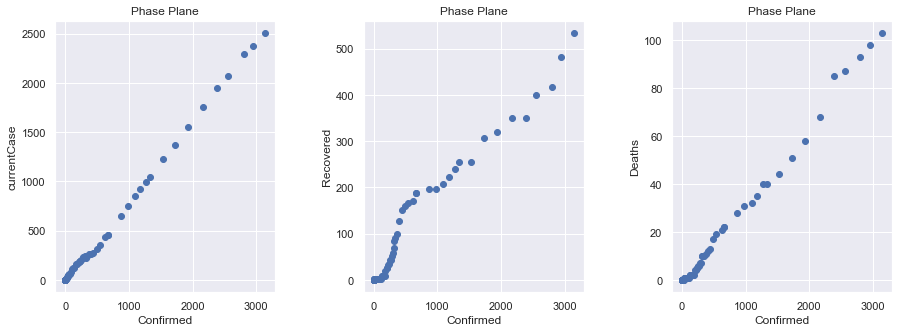

In [31]:
key_feat =  need_feature[0]
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cols = ['currentCase', 'Recovered', 'Deaths']
for i in range(1,4):
    ax = fig.add_subplot(1, 3, i)
    ax.scatter(Nigeria[key_feat], Nigeria[cols[i-1]])
    ax.set_xlabel(key_feat)
    ax.set_ylabel(cols[i-1])
    ax.set_title('Phase Plane')

In [59]:
def polyRegression(x=None, y=None, degree=1):
    """
        params: x array-like predictor
        params: y array-like target
    
    """
    scaler=MinMaxScaler()
    lr=Lasso(alpha=100)
    multi_rgr = MultiOutputRegressor(lr)
    
    Input = [('modal',multi_rgr)]
    pipe=Pipeline(Input)
    pipe.fit(x.reshape(-1, 1), y)
    #x=scaler.fit_transform()
    
    poly_pred=pipe.predict(x.reshape(-1, 1))
    
    #sorting predicted values with respect to predictor
    pred = []
    for i in range(y.shape[1]):
        sorted_zip = sorted(zip(x, poly_pred[:,i]))
        _, poly_pred1 = zip(*sorted_zip)
        pred.append(poly_pred1)
    
    
    return np.asfarray(pred).T, pipe

In [60]:
prediction, model = polyRegression(x=Nigeria[key_feat].values,
                                  y=Nigeria[['Deaths','Recovered','currentCase']].values, degree=7)

In [61]:
x=np.array([5000]).reshape(-1,1)
y=model.predict(x)
y

array([[ 162.7680149 ,  831.50174848, 4003.64113838]])

In [62]:
df_predict = pd.DataFrame(prediction, columns=['Deaths','Recovered','currentCase'],
                          index=Nigeria.ObservationDate)
cols = ['Recovered', 'currentCase', 'Deaths']
for c in cols:
    score = np.sqrt(mean_squared_error(Nigeria[c] ,df_predict[c]))
    print('{}: RMSE for Polynomial Regression => {}\n'.format(c, score))

Recovered: RMSE for Polynomial Regression => 27.3341390583897

currentCase: RMSE for Polynomial Regression => 27.345939404930295

Deaths: RMSE for Polynomial Regression => 1.9687739219398477



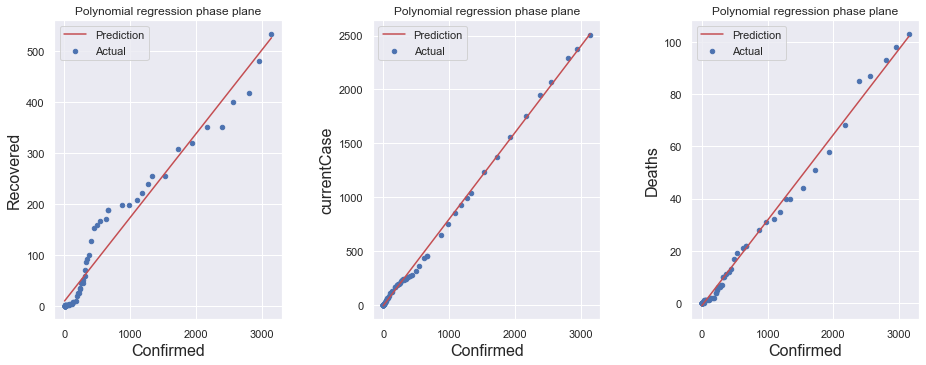

In [63]:
fig= plt.figure(figsize=(15.5,5.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cols = ['Recovered', 'currentCase', 'Deaths']
for i in range(1,4):
    ax=fig.add_subplot(1, 3, i)
    ax.scatter(Nigeria[key_feat], Nigeria[cols[i-1]], s=20, label='Actual')
    ax.plot(Nigeria[key_feat], df_predict[cols[i-1]] ,'r', label='Prediction')
    ax.set_xlabel(key_feat,fontsize=16)
    ax.set_ylabel(cols[i-1],fontsize=16)
    ax.legend(loc='best')
    ax.set_title('Polynomial regression phase plane')

array([[ -948233.81070767, -7322370.84967118,  8275617.2995651 ]])

In [30]:
cols = ['Recovered', 'currentCase', 'Deaths']
for c in cols:
    score = np.sqrt(mean_squared_error(Nigeria[c] ,df_predict[c]))
    print('{}: RMSE for Polynomial Regression => {}\n'.format(c, score))

Recovered: RMSE for Polynomial Regression => 6.433498567169023

currentCase: RMSE for Polynomial Regression => 6.365602996361036

Deaths: RMSE for Polynomial Regression => 0.6952887702329612



### See prediction

Text(0, 0.5, 'cummulative')

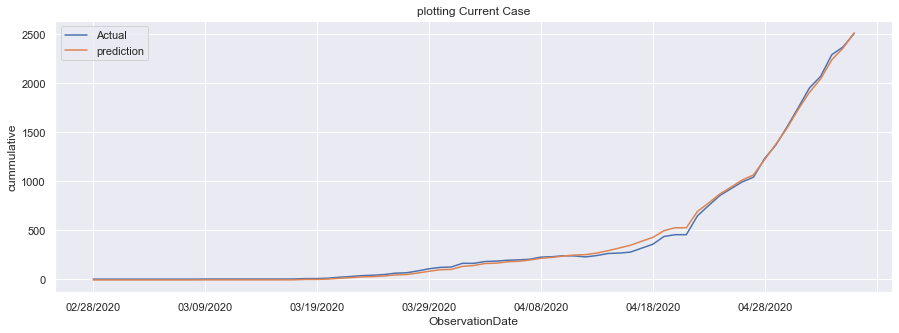

In [64]:
xplot = Nigeria.currentCase.copy()
xplot.index = Nigeria.ObservationDate
ag = xplot.plot(legend=True,label='Actual', figsize=(15,5))
df_predict.currentCase.plot(legend=True, label='prediction', ax=ag, title='plotting Current Case')
plt.ylabel('cummulative')

Text(0, 0.5, 'cummulative')

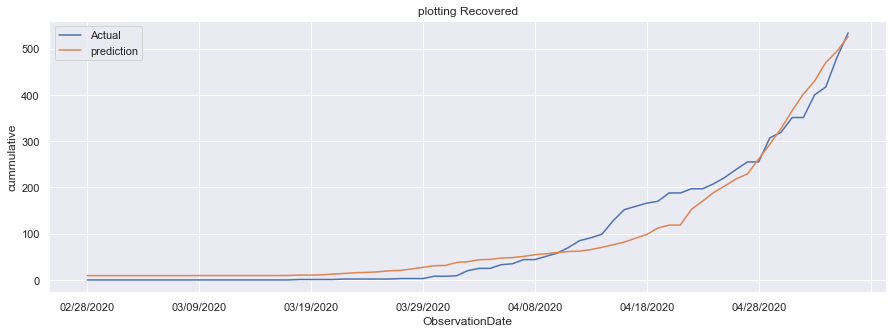

In [65]:
yplot = Nigeria.Recovered.copy()
yplot.index = Nigeria.ObservationDate
ah = yplot.plot(legend=True,label='Actual', figsize=(15,5))
df_predict.Recovered.plot(legend=True, label='prediction', ax=ah, title='plotting Recovered')
plt.ylabel('cummulative')

# Prophet model for Confirmed case

In [66]:
#importing package
from fbprophet import Prophet

In [75]:
confirm = Nigeria[['ObservationDate', key_feat]]
#confirm['Confirmed']=np.log(confirm['Confirmed']+1)

In [76]:
confirm.head(3)

,ObservationDate,Confirmed
2683,02/28/2020,1.0
2800,02/29/2020,1.0
2926,03/01/2020,1.0


In [77]:
prec = confirm.rename(columns={'ObservationDate':'ds', key_feat:'y'})

In [78]:
prec.head(3)

,ds,y
2683,02/28/2020,1.0
2800,02/29/2020,1.0
2926,03/01/2020,1.0


In [79]:
m = Prophet( 
            daily_seasonality=True)
m.fit(prec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [72]:
futureDays = m.make_future_dataframe(periods=90)
futureDays.head(7)

,ds
0,2020-02-28
1,2020-02-29
2,2020-03-01
3,2020-03-02
4,2020-03-03
5,2020-03-04
6,2020-03-05


In [80]:
Vip=pd.DataFrame({
    'holiday': ['Abba Kyari death','Abba Kyari confirmed'],
    'ds':pd.to_datetime(['2020-04-17','2020-03-27']),
    'lower_window':0,
    'upper_window':5})
Vip.head()

,holiday,ds,lower_window,upper_window
0,Abba Kyari death,2020-04-17,0,5
1,Abba Kyari confirmed,2020-03-27,0,5


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


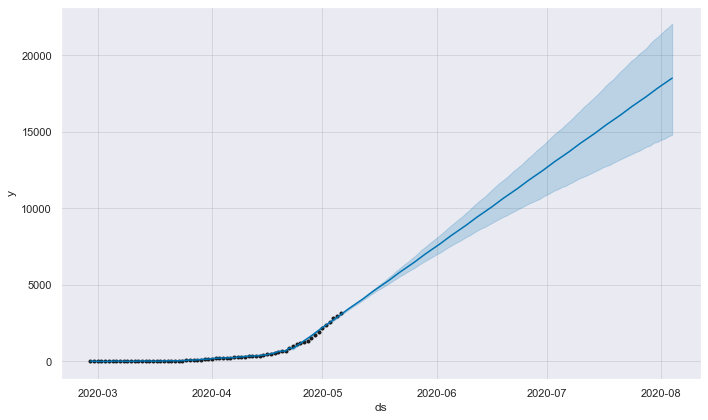

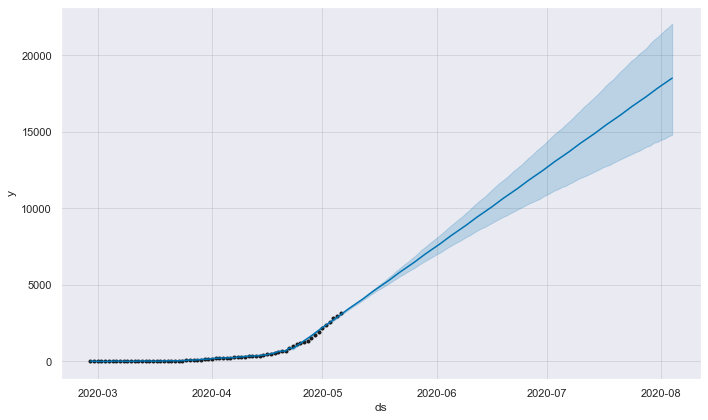

In [81]:
m2=Prophet(holidays=Vip,daily_seasonality=True).fit(prec)
future2=m2.make_future_dataframe(periods=90)
forecast2=m2.predict(future2)
m2.plot(forecast2)

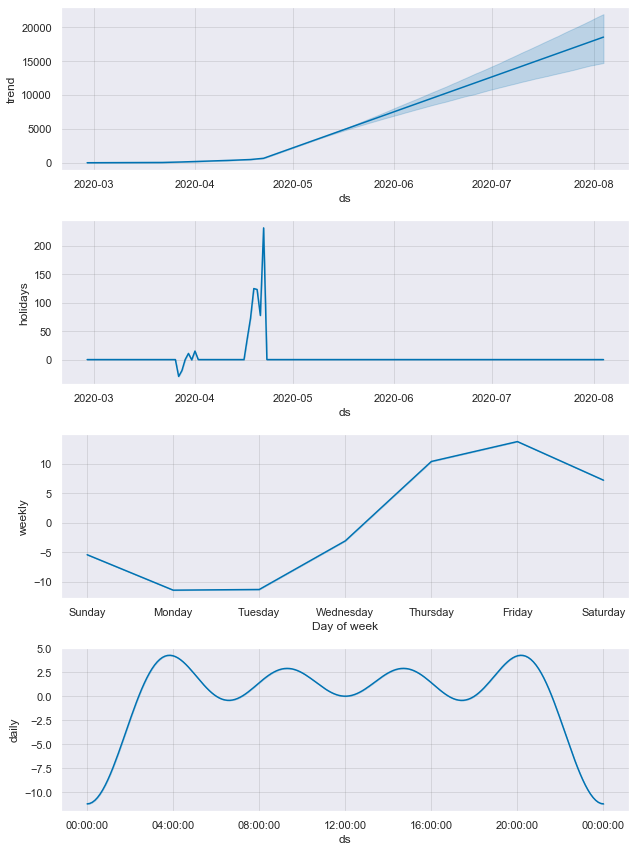

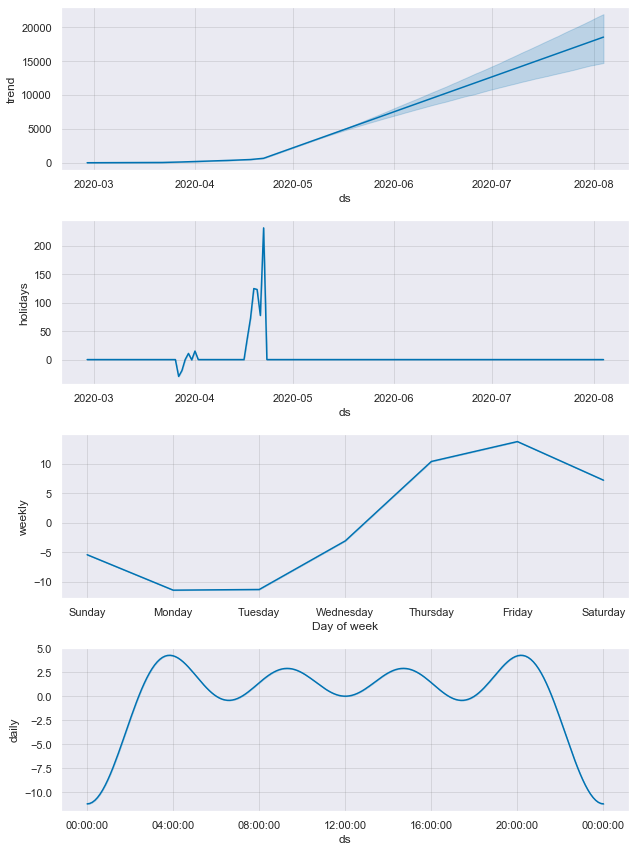

In [257]:
m2.plot_components(forecast2)

In [88]:
confirmed_forecast = m.predict(futureDays)
#np.exp(confirmed_forecast)

In [89]:
confirmed_forecast=confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [90]:
confirmed_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-28,-10.006395,-80.189416,58.664908
1,2020-02-29,-10.352813,-76.890365,58.134268
2,2020-03-01,-11.845765,-77.480340,57.027391
3,2020-03-02,-13.279173,-78.995444,51.188071
4,2020-03-03,-17.825160,-89.235726,50.441424
...,...,...,...,...
154,2020-07-31,17103.493660,13987.919760,20243.035573
155,2020-08-01,17265.587401,14094.696806,20450.939048
156,2020-08-02,17426.534608,14143.301935,20679.639289
157,2020-08-03,17587.541359,14278.016828,20908.618870


Text(0.5, 1, 'Confirmed Nigeria forecasting')

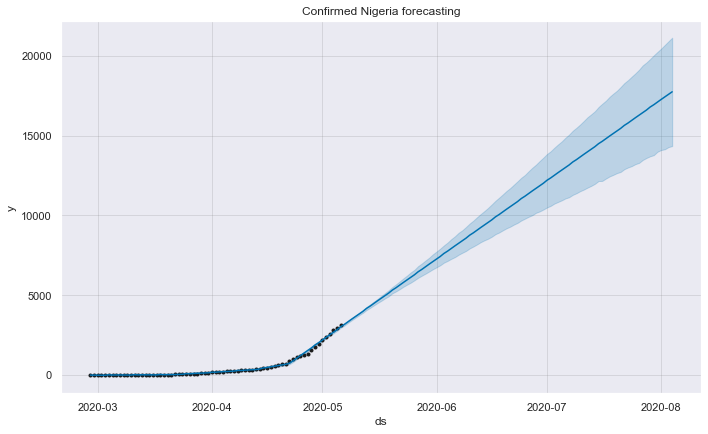

In [91]:
graph = m.plot(confirmed_forecast)
plt.title('Confirmed Nigeria forecasting')

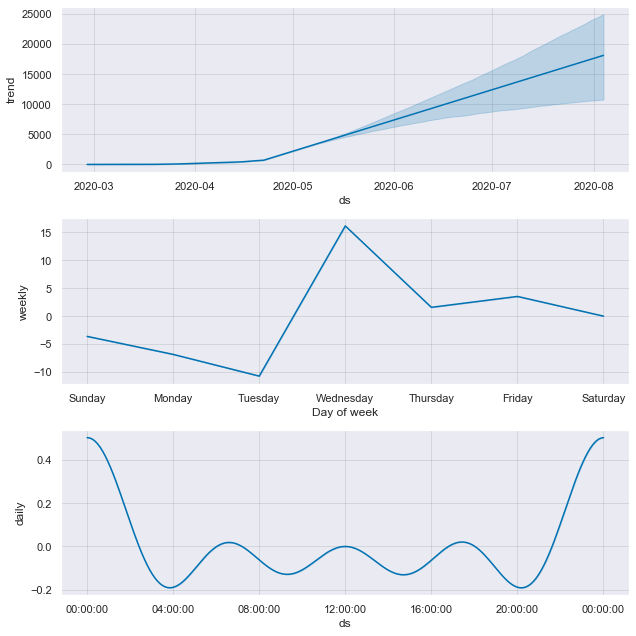

In [190]:
graph1 = m.plot_components(confirmed_forecast)

## Validation 

In [132]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
#for cross validation we are taking the range of our data 
df_cv = cross_validation(m, initial='30 days', period='1 days', horizon = '7 days')
df_cv.head(3)

INFO:fbprophet:Making 32 forecasts with cutoffs between 2020-03-29 00:00:00 and 2020-04-29 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [58]:
df_p = performance_metrics(df_cv)
df_p.head(3)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,10279.219915,101.386488,67.301547,0.083912,0.068974,0.28125
1,2 days,22295.163673,149.315651,101.088497,0.116327,0.104388,0.31250
2,3 days,42591.649518,206.377444,142.203665,0.150057,0.167393,0.34375


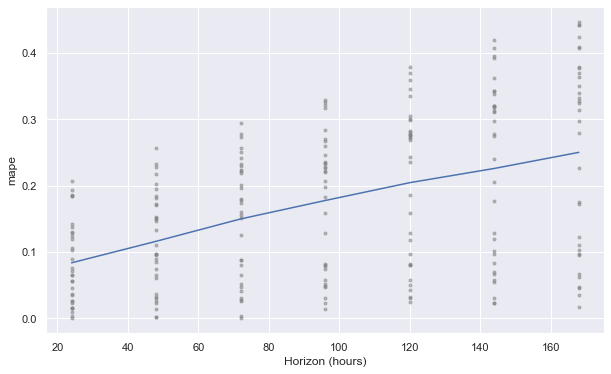

In [59]:
from fbprophet.plot import plot_cross_validation_metric
ufig = plot_cross_validation_metric(df_cv, metric='mape')

In [93]:
pred_data = forecast2
#pred_data['yhat']=np.exp(pred_data['yhat'])
#pred_data['yhat_lower']=np.exp(pred_data['yhat_lower'])
#pred_data['yhat_upper']=np.exp(pred_data['yhat_upper'])


In [94]:
pforecast_lower = pd.DataFrame(model.predict(pred_data.yhat_lower.values.reshape(-1,1)), 
                               columns=['Deaths','Recovered','currentCase'],
)

In [95]:
pforecast = pd.DataFrame(model.predict(pred_data.yhat.values.reshape(-1,1)),
                         columns=['Deaths','Recovered','currentCase'],
                         index=futureDays.ds)

In [96]:
pforecast_upper = pd.DataFrame(model.predict(pred_data.yhat_upper.values.reshape(-1,1)), 
                               columns=['Deaths','Recovered','currentCase'],
                         index=futureDays.ds)

# Forecasting

In [163]:
# function for plotting
def viewing_forecast(actual=None, lower=None, forecast=None, upper=None, title=None):
    
    plt.figure(figsize=(15, 5.5))
    ax = forecast.plot(color='blue')
    
    nd = len(actual)
    time = forecast.index[:nd]
    ax.scatter(time, actual, label='Actual', color='black')
    
    ax.fill_between(forecast.index, lower, upper, alpha=0.9, color='orange')
    
    a = actual.index.to_list()
    b = actual.index.max()
    n = a.index(b)
    pmax = forecast.max()
    pmin = forecast.min()
    ax.vlines(actual.index[n], actual.min(), pmax, linestyles='dashdot', colors='black',
              label='stop actual')
    
    bbox = dict(boxstyle="round", fc='0.8')
    arrowprops = dict(arrowstyle='->', connectionstyle='angle, angleA=0, angleB=100, rad=10', 
                      facecolor='black')
    
    offset = 72
    
    ax.annotate('Actual-Prediction', (actual.index.max(), actual.max()), xytext=(-2*offset, offset), 
                textcoords='offset points', bbox=bbox, arrowprops=arrowprops)
    
    disp = ax.annotate('Forecasting', (actual.index.max(), actual.max()), xytext=(0.5*offset, -offset),
                textcoords='offset points', bbox=bbox, arrowprops=arrowprops)
    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative')
    ax.set_title('{} Nigeria Forecasting'.format(title))
    plt.legend(loc='best')  
    plt.savefig(title + '.png')

In [164]:
datac = Nigeria.set_index('ObservationDate')

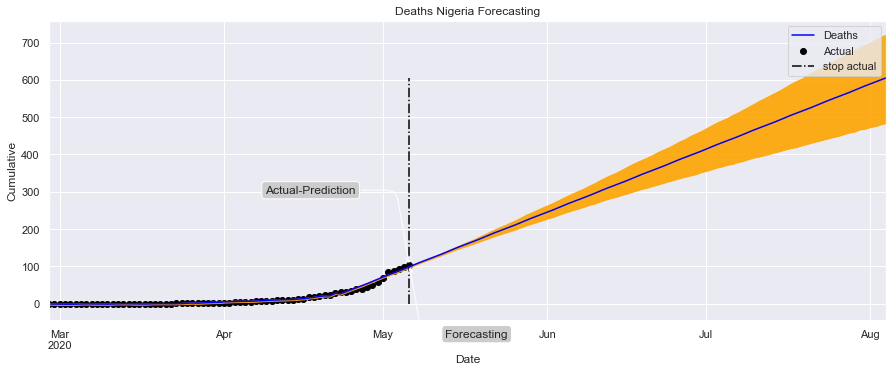

In [165]:
viewing_forecast(actual=datac['Deaths'] ,lower=pforecast_lower['Deaths'],
                 forecast=pforecast['Deaths'] , 
                 upper=pforecast_upper['Deaths'] ,
                 title='Deaths')

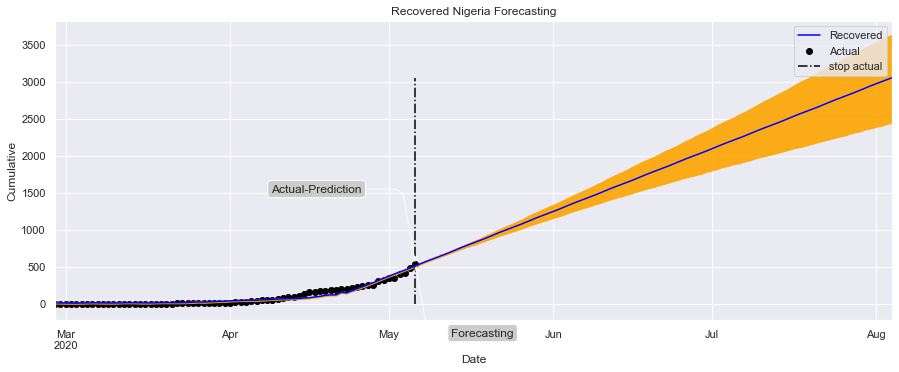

In [166]:
viewing_forecast(actual=datac['Recovered'],lower=pforecast_lower['Recovered'], 
                 forecast=pforecast['Recovered'] , 
                 upper=pforecast_upper['Recovered'] ,
                 title='Recovered')

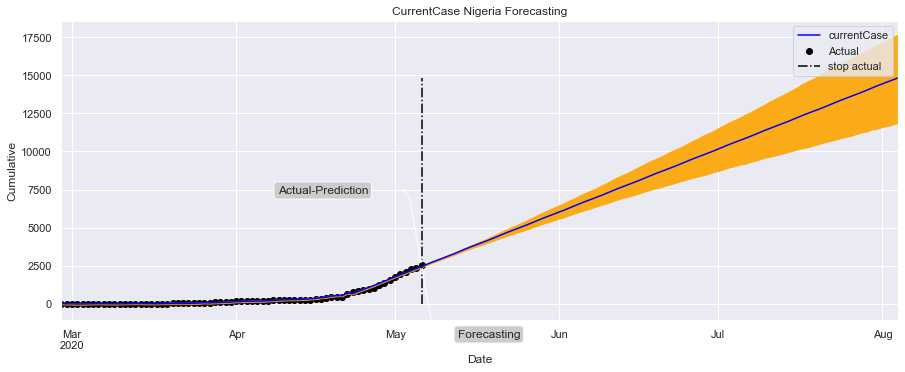

In [167]:
viewing_forecast(actual=datac['currentCase'],lower=pforecast_lower['currentCase'], 
                 forecast=pforecast['currentCase'] , 
                 upper=pforecast_upper['currentCase'] ,
                 title='CurrentCase')

# Transmission dynamics of the virus: $\beta(t), \gamma(t), \delta(t)$ **and** $R_0(t)$ 

In [32]:
def determinate_beta_gamma_delta(data=None):
    '''
        this function compute transmission rate, recovered rate and fatalities rate over time
        params: data
        return: beta, gamma, delta
    '''
    
    beta = []
    gamma = []
    delta = []
    
    for t in range(len(data.ObservationDate.values)):
        
        x = data.Confirmed.iloc[t]
        y = data.Deaths.iloc[t]
        z = data.Recovered.iloc[t]
        w = data.currentCase.iloc[t]
        
        if x == 0.0:
            beta.append(0)
            gamma.append(0)
            delta.append(0)
        else:
            beta_t = w/x
            gamma_t = z/x
            delta_t = y/x
            
            beta.append(beta_t)
            gamma.append(gamma_t)
            delta.append(delta_t)
            
    return np.array(beta), np.array(gamma), np.array(delta)        

In [33]:
transmission, recovery, fatality = determinate_beta_gamma_delta(data=Nigeria)

In [34]:
parameter_dynamic = pd.DataFrame()
parameter_dynamic['beta'] = transmission
parameter_dynamic['gamma'] = recovery
parameter_dynamic['delta'] = fatality
parameter_dynamic.index = Nigeria.ObservationDate

In [35]:
parameter_dynamic.head()

,beta,gamma,delta
ObservationDate,,,
02/28/2020,1.0,0.0,0.0
02/29/2020,1.0,0.0,0.0
03/01/2020,1.0,0.0,0.0
03/02/2020,1.0,0.0,0.0
03/03/2020,1.0,0.0,0.0


In [36]:
def find_R0(data=None):
    '''
        This function compute R0 over time
        params: data
        return: R0
    '''
    return data.beta.values/(data.gamma.values + data.delta.values)

In [37]:
#Compute R0
parameter_dynamic['R0'] = find_R0(data=parameter_dynamic)
print(parameter_dynamic['R0'].min())
parameter_dynamic.columns=['\u03B2', '\u03B3', '\u03B4','R0']
parameter_dynamic.columns


1.6787878787878787


Index(['β', 'γ', 'δ', 'R0'], dtype='object')

In [38]:
print('\u03B2')

β


[(0, 1.1909620476584781)]

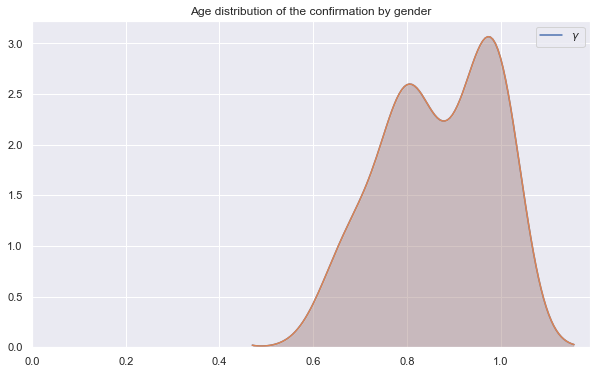

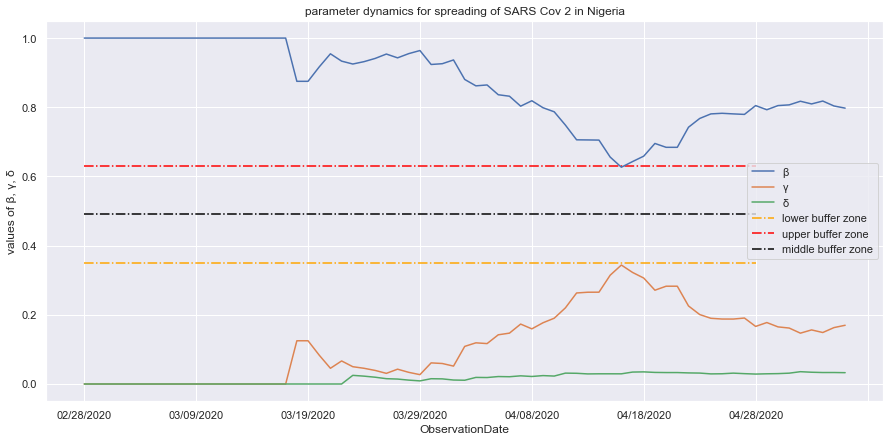

In [34]:
parameter_dynamic[['\u03B2', '\u03B3', '\u03B4']].plot(figsize=(15,7))
plt.ylabel('values of \u03B2, \u03B3, \u03B4')
plt.hlines(0.35, 0, 60, linestyles='dashdot',color='orange',label='lower buffer zone')
plt.hlines(0.63, 0, 60, linestyles='dashdot',color='red', label='upper buffer zone')
plt.hlines(0.49, 0, 60, linestyles='dashdot', color='black',label='middle buffer zone')
plt.legend(loc='best')
plt.title('parameter dynamics for spreading of SARS Cov 2 in Nigeria')
plt.savefig('paramater dynamics.png')

### Explanation

**The buffer zone** is the zone where transmission rate and recovery rate are very near i.e $\beta(t) - \gamma(t) - \delta(t) \approx 0$ (see daily report above) and also it is a zone where the transition between transmmision rate and recovery rate occurs. if $\beta(t) < 0.35$ then the disease is decreasing importantly and if $\gamma(t) > 0.63$ the patient who are infective become recovered patient importantly. 

In [41]:
parameter_dynamic.loc[parameter_dynamic['R0']==min(parameter_dynamic['R0'])]

,β,γ,δ,R0
ObservationDate,,,,
04/16/2020,0.626697,0.343891,0.029412,1.678788


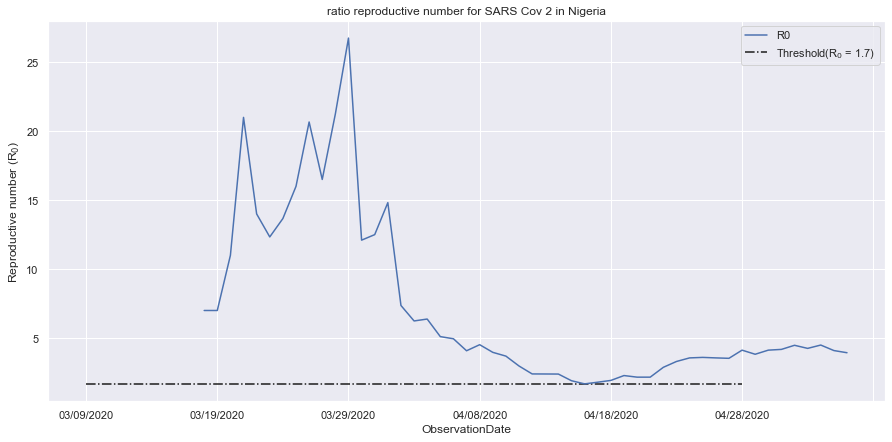

In [42]:
# Plot R0
parameter_dynamic['R0'].plot(figsize=(15,7))
plt.ylabel('Reproductive number' + ' (R' + r'$_0$' +')')
plt.hlines(1.67, 10, 60, linestyles='dashdot', label='Threshold'+'(R' + r'$_0$' +' = 1.7)')
plt.legend(loc='best')
plt.title('ratio reproductive number for SARS Cov 2 in Nigeria')
plt.savefig('reproductive rate.png')

#### Explanation

- if $R_0(t) < 1$ then the disease dies out over time.
- if $R_0(t) > 1$ then the disease outbreaks again over time.

# Growth rate for Infective compartment

In [44]:
def growth_rate(data=None):
    """
        This function compute a growth rate of one variable
        params: data
        return: growth rate x
    
    """
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        b = a/data.iloc[i]
        x.append(b)
        
    return np.array(x)

In [45]:
growth_rate_currentCase = pd.DataFrame(growth_rate(data=Nigeria.currentCase), columns=['currentCase'],
                                       index=Nigeria.ObservationDate)

In [51]:
growth_rate_currentCase.loc[growth_rate_currentCase ['currentCase']==min(growth_rate_currentCase ['currentCase'])]

,currentCase
ObservationDate,
04/12/2020,-0.042017


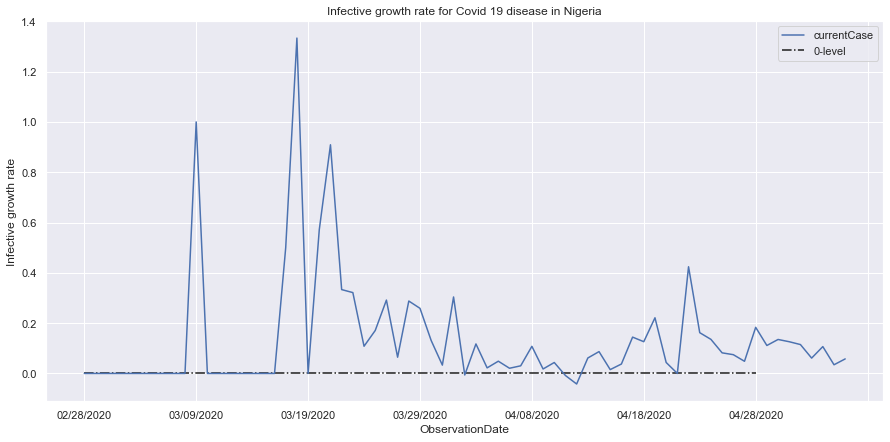

In [46]:
growth_rate_currentCase.plot(figsize=(15,7))
plt.ylabel('Infective growth rate')
plt.hlines(0, 0, 60, linestyles='dashdot', label='0-level')
plt.legend(loc='best')
plt.title('Infective growth rate for Covid 19 disease in Nigeria')
plt.savefig('Growthrate.png')

#### Explanation

See Behavior of disease above.

# Forecasting infective growth rate and ratio reproductive number using autoregression

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

## Infective growth rate

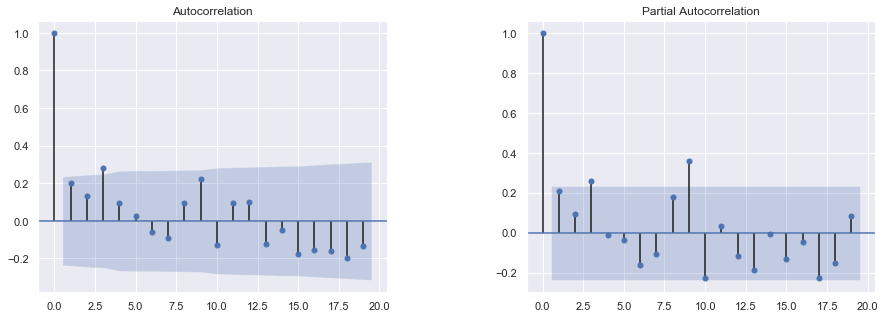

In [79]:
fg = plt.figure(figsize=(15, 5))
fg.subplots_adjust(hspace=0.4, wspace=0.4)
axis1 = fg.add_subplot(1, 2, 1)
axis2 = fg.add_subplot(1, 2, 2)
_ = plot_acf(growth_rate_currentCase.values, ax=axis1)
_ = plot_pacf(growth_rate_currentCase.values, ax=axis2)

Infective growth rate is N($\mu$,$\sigma$) or noise white.

In [175]:
sel_seasonal = ar_select_order(growth_rate_currentCase, 13,  glob=True, seasonal=True)
sel_seasonal.ar_lags

array([1, 3, 7, 8])

In [176]:
res_seasonal = sel_seasonal.model.fit()
res_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AutoReg Model Results                               
===================================================================================
Dep. Variable:                 currentCase   No. Observations:                   69
Model:             Restr. Seas. AutoReg(8)   Log Likelihood                   8.508
Method:                    Conditional MLE   S.D. of innovations              0.210
Date:                     Sat, 09 May 2020   AIC                             -2.723
Time:                             21:37:05   BIC                             -2.308
Sample:                         03-07-2020   HQIC                            -2.561
                              - 05-06-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.1150      0.077      1.487      0.137      -0.037       0.267
seasonal.1        -0.0484      0.104     -0.465      0.642      -0.252       0.156
seasonal.2        -0.0879      0.104     -0.845      0.398      -0.292       0.116
seasonal.3         0.0336      0.103      0.328      0.743      -0.167       0.234
seasonal.4        -0.1252      0.105     -1.197      0.231      -0.330       0.080
seasonal.5         0.1528      0.104      1.475      0.140      -0.050       0.356
seasonal.6        -0.2343      0.114     -2.054      0.040      -0.458      -0.011
currentCase.L1     0.2561      0.115      2.226      0.026       0.031       0.482
currentCase.L3     0.2945      0.113      2.618      0.009       0.074       0.515
currentCase.L7    -0.2691      0.115     -2.341      0.019      -0.494      -0.044
currentCase.L8     0.2619      0.116      2.248      0.025       0.034       0.490
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1745           -0.0000j            1.1745           -0.5000
AR.2           -0.6831           -0.8502j            1.0906           -0.3577
AR.3           -0.6831           +0.8502j            1.0906            0.3577
AR.4            0.0900           -1.1553j            1.1588           -0.2376
AR.5            0.0900           +1.1553j            1.1588            0.2376
AR.6            1.2063           -0.0000j            1.2063           -0.0000
AR.7            1.0910           -0.7050j            1.2990           -0.0913
AR.8            1.0910           +0.7050j            1.2990            0.0913
-----------------------------------------------------------------------------
"""

In [182]:
dir(res_seasonal)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ar_lags',
 '_cache',
 '_data_attr',
 '_df_model',
 '_get_robustcov_results',
 '_hold_back',
 '_lag_repr',
 '_max_lag',
 '_n_totobs',
 '_nobs',
 '_params',
 '_use_t',
 'aic',
 'ar_lags',
 'arfreq',
 'bic',
 'bse',
 'conf_int',
 'cov_params',
 'cov_params_default',
 'data',
 'df_model',
 'df_resid',
 'diagnostic_summary',
 'f_test',
 'fittedvalues',
 'fpe',
 'hqic',
 'initialize',
 'llf',
 'load',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'plot_diagnostics',
 'plot_predict',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'roots',
 'save',
 'scale',
 'sigma2',
 'summary',
 't_test',
 't_test_pairwise',
 

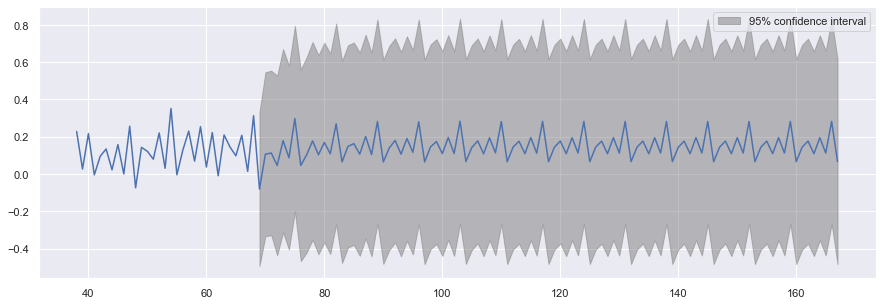

In [183]:
first_plot=  res_seasonal.plot_predict(start='04-06-2020', end='08-13-2020', figsize=(15,5))

In [185]:
first_plot.savefig('whitenoise.png')

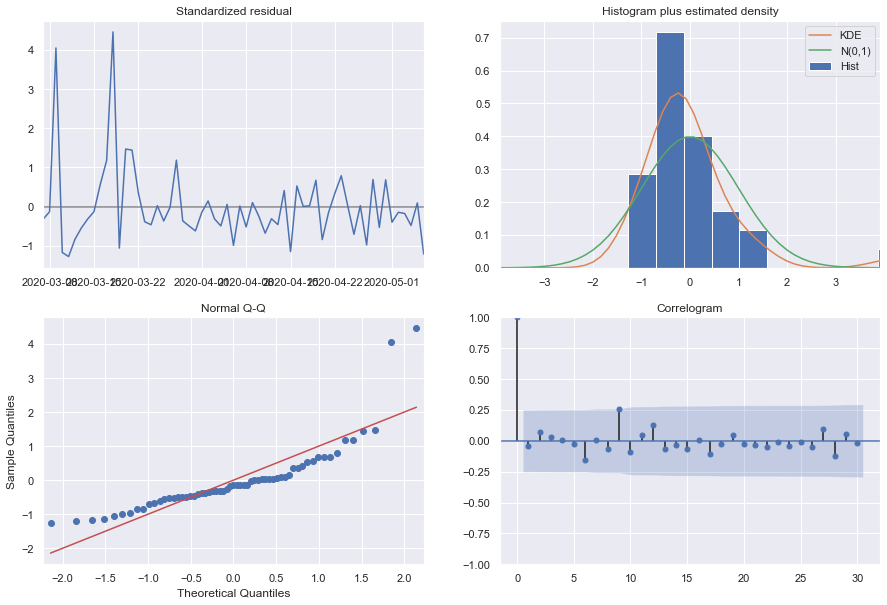

In [186]:
second_plot= res_seasonal.plot_diagnostics(lags=30, figsize=(15,10))
second_plot.savefig('diagonostic.png')

**Conclusion for this graph**

Infective growth rate is a variable that give us an information about the behaviour of covid 19 disease in Cameroon. According to graph and resul, infective growth rate is white noise. 

## Ratio reproductive number

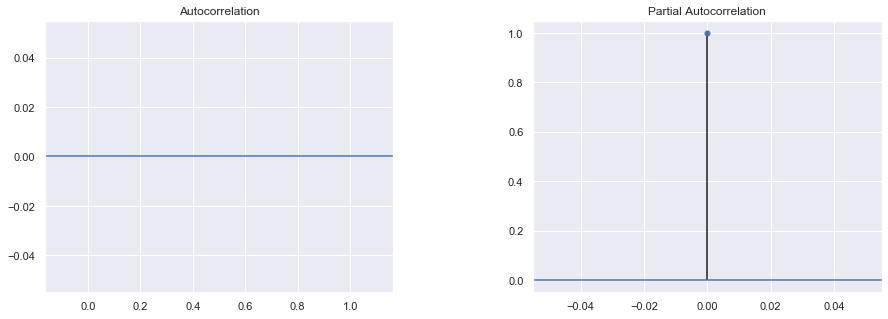

In [84]:
fig0 = plt.figure(figsize=(15, 5))
fig0.subplots_adjust(hspace=0.4, wspace=0.4)
axis01 = fig0.add_subplot(1, 2, 1)
axis02 = fig0.add_subplot(1, 2, 2)
_ = plot_acf(parameter_dynamic.iloc[16:,-1], ax=axis01)
_ = plot_pacf(parameter_dynamic.iloc[16:,-1], ax=axis02)

$R_0t$ is like random walk

In [193]:
parameter_dynamic.head(20)

,β,γ,δ,R0
ObservationDate,,,,
02/28/2020,1.000,0.000,0.0,inf
02/29/2020,1.000,0.000,0.0,inf
03/01/2020,1.000,0.000,0.0,inf
03/02/2020,1.000,0.000,0.0,inf
03/03/2020,1.000,0.000,0.0,inf
03/04/2020,1.000,0.000,0.0,inf
03/05/2020,1.000,0.000,0.0,inf
03/06/2020,1.000,0.000,0.0,inf
03/07/2020,1.000,0.000,0.0,inf


In [194]:
r0 = ar_select_order(parameter_dynamic.iloc[20:,-1], 13,  glob=True, seasonal=True)
r0.ar_lags

array([ 1,  3,  4,  6,  8, 10, 11, 13])

In [195]:
res_r0 = r0.model.fit()
res_r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AutoReg Model Results                                
====================================================================================
Dep. Variable:                           R0   No. Observations:                   49
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                  -6.422
Method:                     Conditional MLE   S.D. of innovations              0.289
Date:                      Sat, 09 May 2020   AIC                             -1.592
Time:                              23:12:18   BIC                             -0.888
Sample:                          04-01-2020   HQIC                            -1.347
                               - 05-06-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9492      0.221      4.294      0.000       0.516       1.382
seasonal.1     0.0677      0.218      0.310      0.756      -0.360       0.495
seasonal.2    -0.0538      0.220     -0.244      0.807      -0.485       0.378
seasonal.3    -0.0987      0.200     -0.493      0.622      -0.491       0.294
seasonal.4    -0.1603      0.208     -0.770      0.441      -0.568       0.248
seasonal.5    -0.0710      0.210     -0.339      0.735      -0.482       0.340
seasonal.6    -0.1121      0.212     -0.530      0.596      -0.527       0.303
R0.L1          0.5681      0.075      7.611      0.000       0.422       0.714
R0.L3          0.5646      0.036     15.891      0.000       0.495       0.634
R0.L4         -0.2534      0.041     -6.226      0.000      -0.333      -0.174
R0.L6         -0.1836      0.028     -6.496      0.000      -0.239      -0.128
R0.L8          0.0806      0.023      3.503      0.000       0.036       0.126
R0.L10         0.1054      0.021      4.913      0.000       0.063       0.147
R0.L11        -0.0563      0.022     -2.533      0.011      -0.100      -0.013
R0.L13        -0.0600      0.015     -3.964      0.000      -0.090      -0.030
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1096           -0.1670j            1.1221           -0.0238
AR.2             1.1096           +0.1670j            1.1221            0.0238
AR.3             0.9950           -0.6262j            1.1756           -0.0894
AR.4             0.9950           +0.6262j            1.1756            0.0894
AR.5             0.3786           -1.2558j            1.3116           -0.2034
AR.6             0.3786           +1.2558j            1.3116            0.2034
AR.7            -1.2886           -0.0000j            1.2886           -0.5000
AR.8            -0.9303           -0.7859j            1.2178           -0.3884
AR.9            -0.9303           +0.7859j            1.2178            0.3884
AR.10           -0.2265           -1.2601j            1.2803           -0.2783
AR.11           -0.2265           +1.2601j            1.2803            0.2783
AR.12           -0.6820           -1.1456j            1.3332           -0.3355
AR.13           -0.6820           +1.1456j            1.3332            0.3355
------------------------------------------------------------------------------
"""

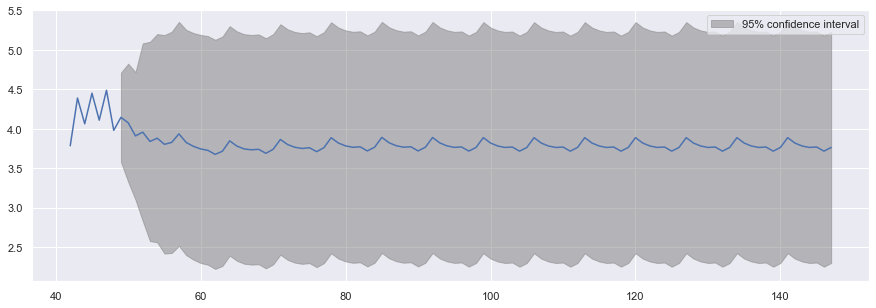

In [198]:
_ =  res_r0.plot_predict(start='04-30-2020', end='08-13-2020', figsize=(15,5))

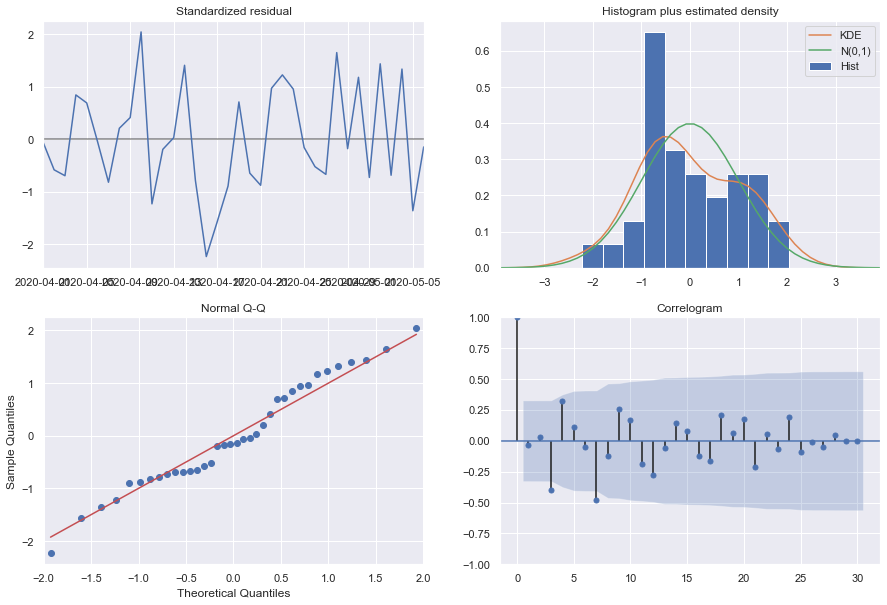

In [199]:
_ = res_r0.plot_diagnostics(lags=30, figsize=(15,10))

# Carrying capacity

The **carrying capacity** of biological species in an environment is the maximun population size of the species that the environment can sustain indefinitely, given the food, habitat, water, and neccesities available in the environment.

**Extrait: Wikipédia carrying capacity**

If we use a carrying capacity definition, we can do this identification:

- biological species is SARS Cov 2
- the food, habitat, water, and neccesities available in the environment is human being in its environment.

The human environment may be a factor in the spread of covid 19 disease. The course of this disease depends on the effectiveness of the barrier measures in combatting the disease. Given that the covid 19 destabilizes the economy of a country, the barrier mesures can be accepted by the population if there is support from the authorities of that country. If we take one of the barrier measures containment, containment is effective in an environment if this environment has a sustained economy otherwise it becomes ineffective because a population can not accept to die of starvation by being confined. That is why, the effective barrier measures reduce carrying capacity that bring an environment for covid 19. So, we write this:

Letting $P(t)$ represent the population size that are confirmed for covid 19 disease over time $t$

- $rP(t)$ the new  population confirmed in time $t$ and r is growth rate.
- $-\dfrac{rP^2(t)}{K(t)}$ is the population that the effective barrier measures remove in a neccesities available for SARS Cov 2.

So, the equation is:

> $\dfrac{dP(t)}{dt} = rP(t) -\dfrac{rP^2(t)}{K(t)}$, where $K(t)$ is carrying capacity over time.



## Upnext!

### Disclaimer

**This notebook does not affirm that all the models are exact it just offers  a track to better understand and give some approximation answers to fight effectively against this pandemic in the world.**